In [17]:
import pandas as pd
import numpy as np
from time import gmtime, strftime
from datetime import datetime
from datetime import timedelta 
import time

from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral11
from bokeh.models import LinearAxis, Range1d
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

from pyspark import SparkContext
from pyspark.sql.functions import countDistinct
from pyspark.sql import SQLContext as sqlc
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()

In [2]:
spark = (SparkSession
         .builder
         .appName("Pyspark")
         .getOrCreate())

### ทดสอบเปิดไฟล์และแบ่งข้อมูลเป็น dataframe

In [13]:
file = open("sample.log","r", errors='ignore')
#count = 0
adata = []
statuslist = ["Accounting start request","Accounting stop request"
              ,"Accounting watchdog update","Authentication succeeded","Authentication failed","Unknown"]
adlist = ["DestinationIPAddress","User-Name","NAS-IP-Address","Framed-IP-Address","Called-Station-ID","Calling-Station-ID","Device IP Address"]
dflist = ["TimeStamp","Status","DestinationIPAddress"
          ,"User-Name","NAS-IP-Address","Framed-IP-Address","Called-Station-ID","Calling-Station-ID","Device IP Address"]
df = pd.DataFrame(columns = dflist)
for line in file:
    phlist = []
    ndata = []
    adata = line.split()
    if adata[5] != "0":
        continue
        #count += 1
    else:
        ndata.append(adata[6]+" "+adata[7])
        for sl in statuslist:
            if sl == "Unknown":
                ndata.append("NaN")
                break
            elif line.find(sl) != -1:
                ndata.append(sl)
                break
        for al in adlist:
            pos = line.find(al)
            posc = line.find(",",pos)
            if pos != -1:
                ndata.append(line[pos + len(al) +1:posc])
            else:
                ndata.append("NaN")
    phlist.append(ndata)
    pdf = pd.DataFrame(phlist,columns=dflist)
    df = df.append(pdf,ignore_index=True)
    #print(ndata)
df.to_csv("wireless.csv",index=False)

,TimeStamp,Status,DestinationIPAddress,User-Name,NAS-IP-Address,Framed-IP-Address,Called-Station-ID,Calling-Station-ID,Device IP Address
0,2016-01-01 00:00:01.216,Accounting stop request,192.168.131.252,15_b8f5432961db3fb45afd@wlan.mnc005.mcc520.3gp...,10.27.216.11,10.46.86.160,64-9e-f3-65-6e-20,fc-e9-98-a7-87-b2,10.27.216.11
1,2016-01-01 00:00:07.287,Accounting start request,192.168.131.252,jsathian,161.200.192.150,10.202.128.52,54-75-d0-de-aa-40,e8-bb-a8-e4-9d-ef,161.200.192.150
2,2016-01-01 00:00:07.472,Accounting stop request,192.168.131.252,15_64a34a4b4141d032331e@wlan.mnc005.mcc520.3gp...,10.27.216.11,10.46.77.165,64-9e-f3-65-6e-20,4c-7c-5f-c8-ad-40,10.27.216.11
3,2016-01-01 00:00:07.474,Accounting start request,192.168.131.252,15_a649b4d808e5ddbd3340@wlan.mnc005.mcc520.3gp...,10.27.216.11,10.46.77.165,64-9e-f3-65-6e-20,4c-7c-5f-c8-ad-40,10.27.216.11
4,2016-01-01 00:00:07.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 00:00:08.001,Authentication succeeded,192.168.131.252,ace,192.168.131.250,NaN,NaN,NaN,192.168.131.250
6,2016-01-01 00:00:08.198,Authentication succeeded,192.168.131.252,schakri,10.49.102.2,NaN,68-86-a7-b1-9e-a0:ChulaWiFi,d8-50-e6-00-cc-ec,10.49.102.2
7,2016-01-01 00:00:10.172,Accounting stop request,192.168.131.252,rpairoj,161.200.192.150,10.201.136.176,54-75-d0-de-aa-40,60-92-17-6c-07-55,161.200.192.150
8,2016-01-01 00:00:10.378,Authentication succeeded,192.168.131.252,57721389,161.200.192.159,NaN,00-3a-98-e5-da-20:ChulaWiFi,4c-b1-99-a9-67-88,161.200.192.159
9,2016-01-01 00:00:10.993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### เปิดไฟล์แบบใช้งาน แบ่งเป็น 
### 1.Mac Address ของ AP 
### 2.Mac Address ของ ผู้ใช้งาน
### 3.Time Stamp
### 4.Status

In [4]:
with open('acs3415-cen77-1_2016-01-01.log', "r",errors="ignore") as testFile:
    #เลือก Status ที่ใช้งานได้มาทำงาน
    statuslist = ["Accounting stop request","Accounting watchdog update","Authentication succeeded"]
    adlist = ["Called-Station-ID","Calling-Station-ID"]
    start = time.time()
    nlist = []
    for line in testFile:
        found = 0
        #แบ่ง 1 line ออกเป็นส่วนๆ
        adata = line.split()
        ndata = []
        if adata[5] != "0":
            #ใช้เฉพาะบรรทัดแรก
            continue
        for al in adlist:
            if line.find(al) != -1:
                found +=1
        if found == 2:
            for sl in statuslist:
                if line.find(sl) != -1:
                    for al in adlist:
                        pos = line.find(al)
                        posc = line.find(",",pos)
                        ndata.append(line[pos + len(al) +1:posc])
                    ndata.append(adata[6] +" "+ adata[7][0:8])
                    ndata.append(sl)
        if ndata != []:
            nlist.append(ndata)
            #print(ndata)
    end = time.time()
    #print(count)
    print(end - start)
nlist[0]

4.2057201862335205


['001A1E00BCF0',
 '20A2E48C739B',
 '2016-01-01 00:00:07',
 'Authentication succeeded']

### ลบบุคคลซ้ำออก

In [5]:
new_list = []
format = "%H:%M"
start = time.time()
for index ,nl in enumerate(nlist):
    i = index + 1
    temp = (nl[0],nl[2][0:16])
    while i < len(nlist):
        #หากเวลาอยู่ในนาทีเดียวกันแล้วพบตัวซ้ำ pop ออก
        if datetime.strptime(nl[2][11:16], format) == datetime.strptime(nlist[i][2][11:16], format):
            if nl[0] == nlist[i][0]:
                if nl[1] == nlist[i][1]:
                    nlist.pop(i)
                    i+=1
                else:
                    i+=1
            else:
                i+=1                
        else:
            break
    new_list.append(temp)
end = time.time()
print(end - start)
new_list

73.77814555168152


[('001A1E00BCF0', '2016-01-01 00:00'),
 ('64-9e-f3-65-84-60', '2016-01-01 00:00'),
 ('54-78-1a-a0-97-10:ChulaWiFi', '2016-01-01 00:00'),
 ('2c-54-2d-3a-18-60', '2016-01-01 00:00'),
 ('64-9e-f3-65-84-60', '2016-01-01 00:00'),
 ('64-9e-f3-65-84-60', '2016-01-01 00:00'),
 ('f4-4e-05-df-73-90:ChulaWiFi', '2016-01-01 00:00'),
 ('2c-54-2d-3a-19-20', '2016-01-01 00:00'),
 ('2c-54-2d-3a-19-20', '2016-01-01 00:00'),
 ('2c-54-2d-3a-18-60', '2016-01-01 00:00'),
 ('f4-4e-05-b5-06-80:ChulaWiFi', '2016-01-01 00:00'),
 ('2c-54-2d-3a-18-60', '2016-01-01 00:00'),
 ('001A1E00BCF0', '2016-01-01 00:00'),
 ('f4-4e-05-a8-59-d0:ChulaWiFi', '2016-01-01 00:00'),
 ('001A1E00BA18', '2016-01-01 00:00'),
 ('001A1E00BA18', '2016-01-01 00:00'),
 ('001A1E00BA18', '2016-01-01 00:00'),
 ('001A1E006DB0', '2016-01-01 00:00'),
 ('001A1E00BCF0', '2016-01-01 00:00'),
 ('2c-54-2d-3a-19-20', '2016-01-01 00:00'),
 ('64-a0-e7-29-32-70:ChulaWiFi', '2016-01-01 00:00'),
 ('2c-54-2d-3a-19-20', '2016-01-01 00:00'),
 ('001A1E00BCF0',

### แบ่ง Zone ของตึกออกเป็น 4 จุด แล้วทำการ คัดแยกบริเวณของ Mac Address 
### Zone A คือ ตึก 3
### Zone B คือ ตึก 100 ปี
### Zone C คือ ตึก 4
### Zone D คือ Icanteen

In [6]:
#zone index 0-2 ตึก3 | 3-4 ตึก 100 ปี | 5 ตึก 4 | 6-7 Icanteen
zone=["34-db-fd-b4","68-86-a7-f4","68-86-a7-b1","34-62-88-e2","18-9c-5d-9b","34-db-fd-67-f7","68-86-a7-46","34-db-fd-0b"]
zone_list = []
for nl in new_list:
    for index, z in enumerate(zone):
        if nl[0].find(z) != -1:
            if index >=0 and index <=2:
                zone_list.append(("zoneA",nl[1]))
            elif index == 3 or index == 4:
                zone_list.append(("zoneB",nl[1]))
            elif index == 5:
                zone_list.append(("zoneC",nl[1]))
            elif index == 6 or index == 7:
                zone_list.append(("zoneD",nl[1]))
            break
zone_list

[('zoneA', '2016-01-01 00:00'),
 ('zoneA', '2016-01-01 00:01'),
 ('zoneA', '2016-01-01 00:01'),
 ('zoneA', '2016-01-01 00:02'),
 ('zoneA', '2016-01-01 00:02'),
 ('zoneC', '2016-01-01 00:03'),
 ('zoneA', '2016-01-01 00:04'),
 ('zoneA', '2016-01-01 00:04'),
 ('zoneA', '2016-01-01 00:04'),
 ('zoneA', '2016-01-01 00:04'),
 ('zoneA', '2016-01-01 00:05'),
 ('zoneA', '2016-01-01 00:05'),
 ('zoneA', '2016-01-01 00:05'),
 ('zoneA', '2016-01-01 00:06'),
 ('zoneA', '2016-01-01 00:06'),
 ('zoneC', '2016-01-01 00:06'),
 ('zoneA', '2016-01-01 00:06'),
 ('zoneA', '2016-01-01 00:06'),
 ('zoneA', '2016-01-01 00:07'),
 ('zoneA', '2016-01-01 00:07'),
 ('zoneA', '2016-01-01 00:07'),
 ('zoneA', '2016-01-01 00:08'),
 ('zoneA', '2016-01-01 00:08'),
 ('zoneA', '2016-01-01 00:08'),
 ('zoneD', '2016-01-01 00:09'),
 ('zoneD', '2016-01-01 00:09'),
 ('zoneA', '2016-01-01 00:12'),
 ('zoneA', '2016-01-01 00:12'),
 ('zoneA', '2016-01-01 00:12'),
 ('zoneA', '2016-01-01 00:13'),
 ('zoneA', '2016-01-01 00:14'),
 ('zoneA

### ใช้ Dataframe ของ spark

In [7]:
wire_list = spark.createDataFrame(zone_list,["Zone","Time"])
wire_list.show(100)

+-----+----------------+
| Zone|            Time|
+-----+----------------+
|zoneA|2016-01-01 00:00|
|zoneA|2016-01-01 00:01|
|zoneA|2016-01-01 00:01|
|zoneA|2016-01-01 00:02|
|zoneA|2016-01-01 00:02|
|zoneC|2016-01-01 00:03|
|zoneA|2016-01-01 00:04|
|zoneA|2016-01-01 00:04|
|zoneA|2016-01-01 00:04|
|zoneA|2016-01-01 00:04|
|zoneA|2016-01-01 00:05|
|zoneA|2016-01-01 00:05|
|zoneA|2016-01-01 00:05|
|zoneA|2016-01-01 00:06|
|zoneA|2016-01-01 00:06|
|zoneC|2016-01-01 00:06|
|zoneA|2016-01-01 00:06|
|zoneA|2016-01-01 00:06|
|zoneA|2016-01-01 00:07|
|zoneA|2016-01-01 00:07|
|zoneA|2016-01-01 00:07|
|zoneA|2016-01-01 00:08|
|zoneA|2016-01-01 00:08|
|zoneA|2016-01-01 00:08|
|zoneD|2016-01-01 00:09|
|zoneD|2016-01-01 00:09|
|zoneA|2016-01-01 00:12|
|zoneA|2016-01-01 00:12|
|zoneA|2016-01-01 00:12|
|zoneA|2016-01-01 00:13|
|zoneA|2016-01-01 00:14|
|zoneA|2016-01-01 00:16|
|zoneA|2016-01-01 00:17|
|zoneA|2016-01-01 00:17|
|zoneA|2016-01-01 00:18|
|zoneA|2016-01-01 00:20|
|zoneA|2016-01-01 00:24|


### ทำ GroupBy โดยนับ zone เดียวกันในเวาเดียวกัน 

In [8]:
gr = wire_list.groupBy("Time","Zone").agg(F.count("Zone").alias("Count"))
gr.show(100)

+----------------+-----+-----+
|            Time| Zone|Count|
+----------------+-----+-----+
|2016-01-01 01:36|zoneA|    1|
|2016-01-01 03:09|zoneA|    3|
|2016-01-01 03:23|zoneA|    2|
|2016-01-01 01:48|zoneA|    1|
|2016-01-01 02:28|zoneA|    1|
|2016-01-01 03:05|zoneD|    1|
|2016-01-01 10:02|zoneA|    1|
|2016-01-01 14:59|zoneA|    2|
|2016-01-01 15:40|zoneA|    2|
|2016-01-01 19:45|zoneA|    1|
|2016-01-01 19:51|zoneA|    2|
|2016-01-01 19:53|zoneA|    2|
|2016-01-01 20:38|zoneD|    1|
|2016-01-01 10:21|zoneA|    1|
|2016-01-01 11:09|zoneA|    1|
|2016-01-01 11:26|zoneA|    3|
|2016-01-01 19:20|zoneA|    3|
|2016-01-01 19:32|zoneC|    1|
|2016-01-01 22:10|zoneA|    1|
|2016-01-01 00:29|zoneA|    2|
|2016-01-01 09:06|zoneD|    1|
|2016-01-01 14:22|zoneD|    1|
|2016-01-01 21:38|zoneA|    1|
|2016-01-01 06:53|zoneA|    1|
|2016-01-01 20:02|zoneA|    3|
|2016-01-01 00:02|zoneA|    2|
|2016-01-01 03:26|zoneD|    1|
|2016-01-01 06:23|zoneA|    2|
|2016-01-01 07:59|zoneD|    1|
|2016-01

### ลง matplot lib

Zone
zoneA    AxesSubplot(0.125,0.2;0.775x0.68)
zoneB    AxesSubplot(0.125,0.2;0.775x0.68)
zoneC    AxesSubplot(0.125,0.2;0.775x0.68)
zoneD    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

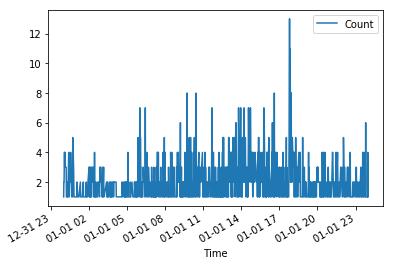

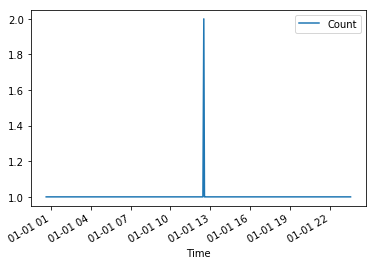

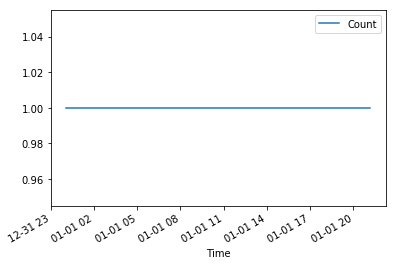

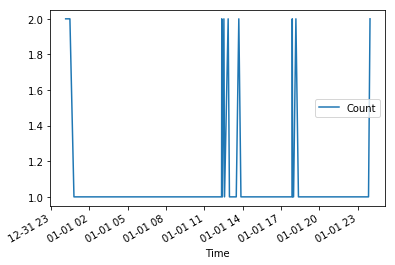

In [20]:
grr = gr.toPandas()
grr['Time'] = pd.to_datetime(grr['Time'],format='%Y-%m-%d %H:%M')
grr.groupby("Zone").plot("Time","Count")#,ax=ax, legend=False)